# Decision tree

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
training_df = pd.read_csv('../Preprocess/GadgetX-NewMDCLUSTER-1/paired-csv/training.csv')
testing_df = pd.read_csv('../Preprocess/GadgetX-NewMDCLUSTER-2/paired-csv/training.csv')

In [3]:
# Preparing data for the model

X_train = training_df.drop(columns=['pair', 'will_merge']).values
X_test = testing_df.drop(columns=['pair', 'will_merge']).values
y_train = training_df['will_merge'].values
y_test = testing_df['will_merge'].values

In [4]:
tree_clf = DecisionTreeClassifier(random_state = 36)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=36)

In [5]:
tree_clf.score(X_test, y_test)

0.9992175273865415

In [6]:
predict = tree_clf.predict(X_test)

In [7]:
cm = confusion_matrix(y_test, predict)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35145
           1       1.00      1.00      1.00     35145

    accuracy                           1.00     70290
   macro avg       1.00      1.00      1.00     70290
weighted avg       1.00      1.00      1.00     70290



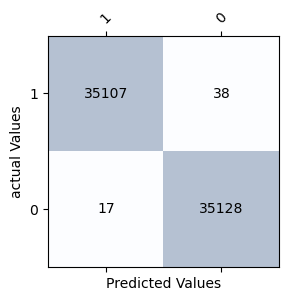

In [8]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
classes=["1", "0"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values',)
plt.ylabel('actual Values',);
print(classification_report(y_test, predict))

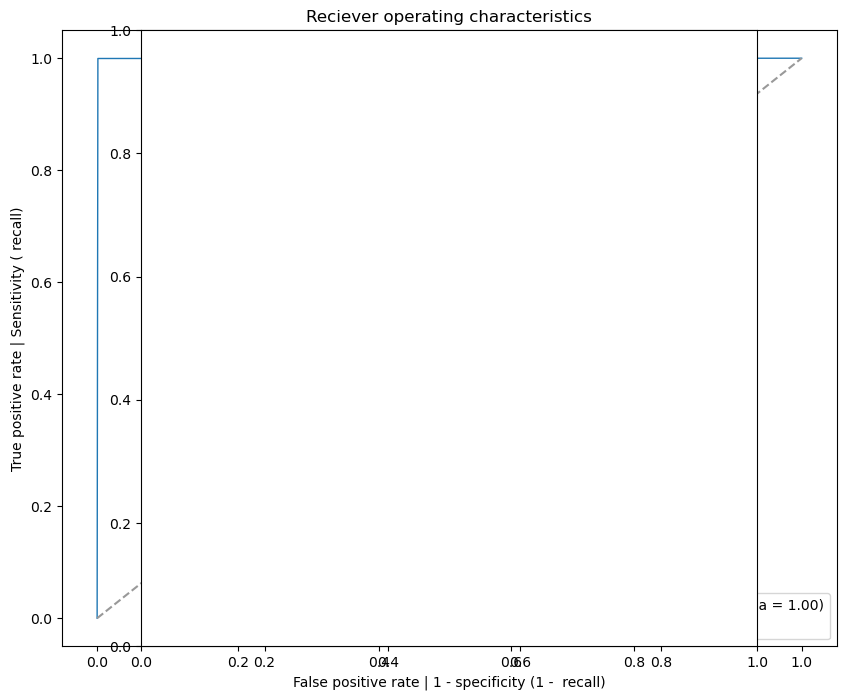

In [9]:
# Plot the rciever opertaing characteristic curve (ROC)
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10,8))
#probas_ = model.predict(X_valid['speed'])
fpr, tpr, thresholds = roc_curve(y_test, predict)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr, lw=1, label='ROC fold (area = %0.2f)' %(roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate | 1 - specificity (1 -  recall)')
plt.ylabel('True positive rate | Sensitivity ( recall)')
plt.title('Reciever operating characteristics')
plt.legend(loc="lower right")
plt.axes().set_aspect(1);


# Use the model on a snapshot file

In [10]:
snapshot_df = pd.read_csv('../Preprocess/GadgetX-NewMDCLUSTER-2/combined-csv/GadgetX-NewMDCLUSTER_0008.snap_030.z7.752_combined.csv')

In [11]:
snapshot_df.head()

,ID,hostHalo,numSubStruct,Mvir,npart,Xc,Yc,Zc,VXc,VYc,...,fMhires,Ekin,Epot,SurfP,Phi0,cNFW,numProgenitors,ProgenitorsID,redshift,snapshot
0,30000000000001,0,0,3.712890e+11,505,498292.985984,495865.218980,483857.668298,-87.25,99.64,...,1.0,2.326100e+16,-3.859090e+16,-5.587780e+15,454302.0,10.71550,2,"[29000000000001, 29000000000230]",7.752,30
1,30000000000002,0,0,2.450840e+11,324,507884.732315,512334.181581,493302.051510,-68.14,-203.51,...,1.0,1.117340e+16,-1.911520e+16,-1.532300e+15,379711.0,9.86040,1,[29000000000002],7.752,30
2,30000000000003,0,0,1.812960e+11,241,491253.186266,506600.519021,498656.249046,101.98,-141.81,...,1.0,5.204000e+15,-9.329820e+15,-2.178880e+15,214333.0,7.08470,1,[29000000000003],7.752,30
3,30000000000004,0,1,1.645620e+11,220,520765.278074,496616.580420,492574.029499,-305.58,-41.74,...,1.0,4.482750e+15,-7.921780e+15,-1.766010e+15,198337.0,6.10724,1,[29000000000004],7.752,30
4,30000000000005,0,0,1.569740e+11,201,507456.363858,510931.589313,491922.277454,-93.27,-142.26,...,1.0,4.508070e+15,-7.869930e+15,-1.525020e+15,192523.0,8.95382,1,[29000000000006],7.752,30


In [16]:
snapshot_df['numSubStruct'].describe()

count    744.00000
mean       0.00672
std        0.09683
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        2.00000
Name: numSubStruct, dtype: float64

In [17]:
snapshot_df['numSubStruct'].sum()

5

In [19]:
subStruct = snapshot_df[snapshot_df['numSubStruct'] > 0]
subStruct

,ID,hostHalo,numSubStruct,Mvir,npart,Xc,Yc,Zc,VXc,VYc,...,fMhires,Ekin,Epot,SurfP,Phi0,cNFW,numProgenitors,ProgenitorsID,redshift,snapshot
3,30000000000004,0,1,1.645620e+11,220,520765.278074,496616.580420,492574.029499,-305.58,-41.74,...,1.0,4.482750e+15,-7.921780e+15,-1.766010e+15,198337.0,6.10724,1,[29000000000004],7.752,30
16,30000000000017,0,1,1.068230e+11,133,510033.976287,493979.342282,502006.504685,-185.75,29.54,...,1.0,2.224480e+15,-3.762300e+15,-6.798690e+14,126161.0,6.89443,1,[29000000000017],7.752,30
17,30000000000018,0,1,1.068230e+11,133,502987.300528,498637.145963,482127.009795,-34.56,-67.19,...,1.0,2.109070e+15,-3.204540e+15,-1.364780e+15,115689.0,2.67717,1,[29000000000031],7.752,30
32,30000000000033,0,2,7.845660e+10,96,477814.834742,498088.832412,482249.929791,173.71,158.98,...,1.0,1.464860e+15,-2.291230e+15,-4.800320e+14,109626.0,7.18767,1,[29000000000034],7.752,30


In [16]:
from itertools import combinations
# Create all possible pairs of halos
halo_pairs = list(combinations(snapshot_df.index, 2))

# Initialize lists to hold the features for each pair
features = ['relative_position', 'relative_velocity', 'mass1', 'mass2', 'numSubStruct1', 'numSubStruct2', 
            'sigV1', 'sigV2', 'lambda1', 'lambda2', 'cNFW1', 'cNFW2', 'Ekin1', 'Ekin2', 'Epot1', 
            'Epot2', 'ovdens1', 'ovdens2']
data = {feature: [] for feature in features}

# Calculate the features for each pair
for pair in halo_pairs:
    halo1 = snapshot_df.loc[pair[0]]
    halo2 = snapshot_df.loc[pair[1]]
    
    position1 = np.array([halo1['Xc'], halo1['Yc'], halo1['Zc']])
    position2 = np.array([halo2['Xc'], halo2['Yc'], halo2['Zc']])
    velocity1 = np.array([halo1['VXc'], halo1['VYc'], halo1['VZc']])
    velocity2 = np.array([halo2['VXc'], halo2['VYc'], halo2['VZc']])

    data['relative_position'].append(np.linalg.norm(position1 - position2))
    data['relative_velocity'].append(np.linalg.norm(velocity1 - velocity2))
    data['mass1'].append(halo1['Mvir'])
    data['mass2'].append(halo2['Mvir'])
    data['numSubStruct1'].append(halo1['numSubStruct'])
    data['numSubStruct2'].append(halo2['numSubStruct'])
    data['sigV1'].append(halo1['sigV'])
    data['sigV2'].append(halo2['sigV'])
    data['lambda1'].append(halo1['lambda'])
    data['lambda2'].append(halo2['lambda'])
    data['cNFW1'].append(halo1['cNFW'])
    data['cNFW2'].append(halo2['cNFW'])
    data['Ekin1'].append(halo1['Ekin'])
    data['Ekin2'].append(halo2['Ekin'])
    data['Epot1'].append(halo1['Epot'])
    data['Epot2'].append(halo2['Epot'])
    data['ovdens1'].append(halo1['ovdens'])
    data['ovdens2'].append(halo2['ovdens'])

# Prepare the features for prediction
prediction_features = pd.DataFrame(data)

# Use the decision tree model to make predictions
predictions = tree_clf.predict(prediction_features)

predictions


c:\Users\hohim\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
# Create a DataFrame with the pairs of halo IDs and the prediction results
prediction_df = pd.DataFrame({
    'pair': [(snapshot_df.loc[pair[0]]['ID'], snapshot_df.loc[pair[1]]['ID']) for pair in halo_pairs],
    'will_merge': predictions
})

merge_counts = prediction_df['will_merge'].value_counts()
merge_counts

0    274972
1      1424
Name: will_merge, dtype: int64

# Ground truth comparison

In [18]:
# Load the snapshot data with the ground truth
snapshot_df_gt = pd.read_csv('../Preprocess/GadgetX-NewMDCLUSTER-2/combined-csv/GadgetX-NewMDCLUSTER_0008.snap_031.z7.510_combined.csv')

In [19]:
# Extract pairs of progenitors, handle cases where the string contains brackets or other non-numeric characters
progenitor_pairs_gt = snapshot_df_gt['ProgenitorsID'].apply(
    lambda x: tuple(map(int, x.strip('[]').split(','))) if isinstance(x, str) else (np.nan,))

# Create a DataFrame with the pairs of halo IDs and the ground truth
ground_truth_df = pd.DataFrame({
    'pair': progenitor_pairs_gt,
    'did_merge': ~snapshot_df_gt['ProgenitorsID'].isna()
})

# Merge the ground truth with the predicted results
comparison_df = pd.merge(prediction_df, ground_truth_df, how='left', on='pair')

comparison_df['did_merge'].fillna(False, inplace=True)

accuracy = (comparison_df['will_merge'] == comparison_df['did_merge']).mean()
accuracy


0.9948515897480427

In [20]:
true_merge_counts = comparison_df['did_merge'].value_counts()
true_merge_counts

False    276395
True          1
Name: did_merge, dtype: int64

In [21]:
comparison_df.to_csv('comparison.csv', index=False)

In [22]:
# Convert the 'did_merge' column to the same data type as 'will_merge'
comparison_df['did_merge'] = comparison_df['did_merge'].astype(int)

confusion_mat = confusion_matrix(comparison_df['did_merge'], comparison_df['will_merge'])

confusion_mat

array([[274972,   1423],
       [     0,      1]], dtype=int64)

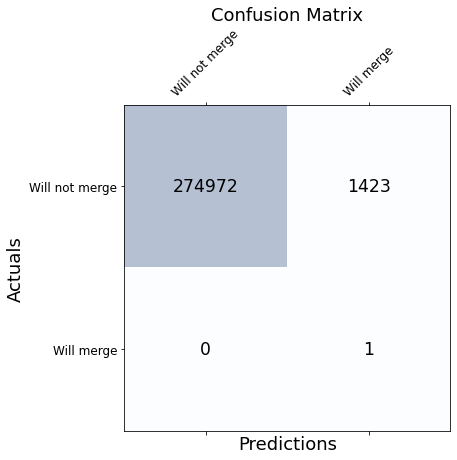

In [23]:
fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(confusion_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        ax.text(x=j, y=i, s=confusion_mat[i,j], va='center', ha='center', size='xx-large')

classes = ['Will not merge', 'Will merge']
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)
plt.show()


# RandomForest with 0.99 threshold

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=36)

# Train the classifier
forest_clf.fit(X_train, y_train)

probs_rf = forest_clf.predict_proba(prediction_features)
threshold_rf = 0.99
predictions_rf = np.where(probs_rf[:,1] > threshold_rf, 1, 0)

# Create a DataFrame with the pairs of halo IDs and the prediction results
prediction_df_rf = pd.DataFrame({
    'pair': [(snapshot_df.loc[pair[0]]['ID'], snapshot_df.loc[pair[1]]['ID']) for pair in halo_pairs],
    'will_merge': predictions_rf
})

merge_counts_rf = prediction_df_rf['will_merge'].value_counts()
merge_counts_rf

c:\Users\hohim\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0    276214
1       182
Name: will_merge, dtype: int64

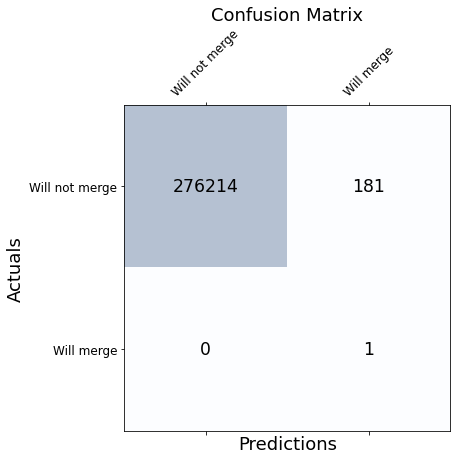

In [40]:
comparison_df_rf = pd.merge(prediction_df_rf, ground_truth_df, how='left', on='pair')

comparison_df_rf['did_merge'].fillna(False, inplace=True)

comparison_df_rf['did_merge'] = comparison_df_rf['did_merge'].astype(int)

comparison_df_rf = confusion_matrix(comparison_df_rf['did_merge'], comparison_df_rf['will_merge'])

fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(comparison_df_rf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(comparison_df_rf.shape[0]):
    for j in range(comparison_df_rf.shape[1]):
        ax.text(x=j, y=i, s=comparison_df_rf[i,j], va='center', ha='center', size='xx-large')
 
classes = ['Will not merge', 'Will merge']
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)
plt.show()


# Gradient Boosting with 0.99 threshold

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=36)

# Train the classifier
gb_clf.fit(X_train, y_train)

probs_gb = gb_clf.predict_proba(prediction_features)
threshold_gb = 0.99
predictions_gb = np.where(probs_gb[:,1] > threshold_gb, 1, 0)

# Create a DataFrame with the pairs of halo IDs and the prediction results
prediction_df_gb = pd.DataFrame({
    'pair': [(snapshot_df.loc[pair[0]]['ID'], snapshot_df.loc[pair[1]]['ID']) for pair in halo_pairs],
    'will_merge': predictions_gb
})

merge_counts_gb = prediction_df_gb['will_merge'].value_counts()
merge_counts_gb

c:\Users\hohim\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


0    275695
1       701
Name: will_merge, dtype: int64

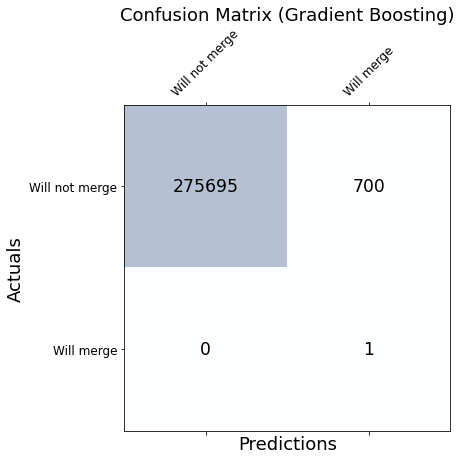

In [46]:
comparison_df_gb = pd.merge(prediction_df_gb, ground_truth_df, how='left', on='pair')

comparison_df_gb['did_merge'].fillna(False, inplace=True)

comparison_df_gb['did_merge'] = comparison_df_gb['did_merge'].astype(int)

confusion_mat_gb = confusion_matrix(comparison_df_gb['did_merge'], comparison_df_gb['will_merge'])

fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(confusion_mat_gb, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_mat_gb.shape[0]):
    for j in range(confusion_mat_gb.shape[1]):
        ax.text(x=j, y=i, s=confusion_mat_gb[i,j], va='center', ha='center', size='xx-large')
 
classes = ['Will not merge', 'Will merge']
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix (Gradient Boosting)', fontsize=18)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
plt.yticks(tick_marks, classes, fontsize=12)
plt.show()
